# Opgaveboek - zonneopbrengst

Bekijk het bijgeleverde bestand: "zonneopbrengst.txt".  Hierin staat de opbrengst van zonnepannelen in KWh.  Iedere dag is er een meting gedaan. We willen hiervan een frequentieverdeling van maken (om antwoord te kunnen geven op vragen als: hoeveel dagen is er een opbrengst geweest van 1 KWh?).

- lees het bestand in
- Je maakt best eerst klassen aan (de variabele is continu).  Gebruik een klassenbreedte van 1KWh en zorg dat de linker-grens steeds bij het interval hoort


### Import van de libraries en inlezen van zonneopbrengst.txt

- lees het bestand zonneopbrengst.txt in in een dataframe
- Geef de kolom de naam 'metingen'
- Ouput de eerste 5 kolommen van het dataframe

In [14]:
import pandas as pd
data = pd.read_csv('../../datasets/zonneopbrengst.txt',
                   sep='delimiter',engine='python', header=None, names=['metingen'])
data.head()

metingen
0      1.86
1      4.50
2      7.41
3      5.66
4      6.85

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1216 entries, 0 to 1215
Data columns (total 1 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   metingen  1216 non-null   float64
dtypes: float64(1)
memory usage: 9.6 KB


### Deel de kolom metingen op in klassen
- Bepaal het maximum van alle metingen. We willen immers dat alle metingen in een 
klasse terechtkomen.
- Maak nu klassen aan met een breedte van 1kWh.
- Zorg ervoor dat de linkergrens hoort er telkens bijhoort.

In [21]:
import numpy as np
bins = np.arange(0,data.metingen.max()+1,1, dtype=int)
klassen = pd.cut(data.metingen, bins=bins,right=False)
klassen

0       [1, 2)
1       [4, 5)
2       [7, 8)
3       [5, 6)
4       [6, 7)
         ...  
1211    [0, 1)
1212    [1, 2)
1213    [2, 3)
1214    [0, 1)
1215    [0, 1)
Name: metingen, Length: 1216, dtype: category
Categories (16, interval[int64]): [[0, 1) < [1, 2) < [2, 3) < [3, 4) ... [12, 13) < [13, 14) < [14, 15) < [15, 16)]

### Vraag 1  

- Bepaal de frequentie per klasse en toon dit in een tabel.

In [29]:
ni = klassen.value_counts().sort_index()
ni

[0, 1)      254
[1, 2)      149
[2, 3)      116
[3, 4)       94
[4, 5)       83
[5, 6)       95
[6, 7)      100
[7, 8)      114
[8, 9)       80
[9, 10)      55
[10, 11)     42
[11, 12)     30
[12, 13)      3
[13, 14)      0
[14, 15)      0
[15, 16)      1
Name: metingen, dtype: int64

###  Vraag 2  

Plot de frequenties in een diagram (welk soort diagram is hier op zijn plaats?)

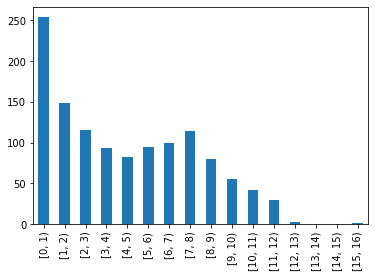

In [30]:
_ = ni.plot.bar()

### Vraag 3  

Geef nu antwoord op de volgende vragen:

- op de meeste dagen van het jaar ligt de dagopbrengst in de klasse ...
- er waren ... dagen met een opbrengst tussen 3 en 4 KWh
- er waren ... dagen met een opbrengst tussen 2 en 4 KWh

Je voelt intuïtief misschien al aan dat de antwoorden op de laatste twee vragen niet echt veel informatie geven.  Dat aantal hangt nl. ook af van het aantal metingen.  We zijn meer geïnteresseerd in het percentage van de dagen waarin de opbrengst tussen 3 en 4 KWh ligt.  Dit kunnen we echter perfect berekenen a.d.h. van relatieve frequenties.  Geef antwoord op de volgende vragen:

- ...% van de dagen lag de opbrengst tussen 3 en 4 KWh
-  ...% van de dagen lag de opbrengst tussen 2 en 4 KWh

-  Stel dat ik op een bepaalde dag een opbrengst van 3 KWh meet.  Welke percentielscore komt hiermee overeen?  Is dat een grote opbrengst?
Merk hierbij op: uit de frequentietabel zou je kunnen afleiden dat een opbrengst tussen 0 en 1 zoveel voorkomt dat 3KWh enorm veel is.  Maar er zijn ook heel veel dagen met meer opbrengst, maar die zijn meer verspreid.  Een cumulatief percentage kan dit laten zien.

In [48]:
from pandas._libs.interval import Interval

ni[Interval(3,4,closed='left')]
ni[Interval(2,3,closed='left')] + ni[Interval(3,4,closed='left')]

94

210

In [53]:
fi = (klassen.value_counts(normalize=True).sort_index()*100).round(1)
fi[Interval(3,4,closed='left')]
fi[Interval(2,3,closed='left')] + fi[Interval(3,4,closed='left')]

7.7

17.2

In [56]:
fi.cumsum()[Interval(2,3,closed='left')]

42.7